Trying to capture the sibling relation with the sequence construction without gender

In [1]:
import nengo
import nengo.spa as spa
from nengo.spa import Vocabulary
import numpy as np

In [2]:
rng = np.random.RandomState(10)
dim = 64*2*2

vocab = Vocabulary(dimensions=dim, rng=rng, max_similarity=0.02, unitary=True)
#zero = spa.SemanticPointer(dim)

incr = vocab.parse("INCREMENT")


zero = vocab.parse("ZERO + SEX*FEMALE")
vocab.add("ONE", vocab.parse("ZERO*INCREMENT+B"))
vocab.add("TWO", vocab.parse("ONE*INCREMENT+C"))
vocab.add("THREE", vocab.parse("TWO*INCREMENT+D"))
vocab.add("FOUR", vocab.parse("THREE*INCREMENT+E"))
vocab.add("FIVE", vocab.parse("FOUR*INCREMENT+F"))

vocab.add("SIX", vocab.parse("ZERO*INCREMENT+G"))
vocab.add("SEVEN", vocab.parse("ONE*INCREMENT+H"))

vocab.add("EIGHT", vocab.parse("SEVEN*INCREMENT+I"))
vocab.add("NINE", vocab.parse("SEVEN*INCREMENT+J"))

# vocab.add("TEN", vocab.parse("NINE*INCREMENT+K"))
# vocab.add("ELEVEN", vocab.parse("TEN*INCREMENT+L"))
# vocab.add("TWELVE", vocab.parse("ELEVEN*INCREMENT+M"))


one = vocab.parse("ONE")
two = vocab.parse("TWO")
three = vocab.parse("THREE")
four = vocab.parse("FOUR")
five = vocab.parse("FIVE")
six = vocab.parse("SIX")
seven = vocab.parse("SEVEN")
eight = vocab.parse("EIGHT")
nine = vocab.parse("NINE")

# ten = vocab.parse("NINE*INCREMENT")

#nine = vocab.parse("NUMBER*NINE+PARITY*EVEN")
#ten = vocab.parse("NUMBER*TEN+PARITY*EVEN")

/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=256, M=10)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=256, M=12)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=256, M=14)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=256, M=16)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=256, M=18)
  len(self.pointers)))
/Users/sugandha/nengo/nengo/spa/vocab.py:114: UserWarning: Could not create a semantic pointer with max_similarity=0.02 (D=256, M=20)
  len(self.pointers)))


In [3]:
# Compute the transformation and convert it into a SP object
T = (~zero*one + ~one*two + ~one*seven + ~two*three + ~seven*eight).v / 5
# T = (~zero*one + ~one*two + ~two*three + ~three*four + ~four*five).v / 5
T = spa.SemanticPointer(T)
print (type(T))

# As expected, the transformation vector is very similar to the increment vector
#print (T.v)
#print (incr.v)
print (np.dot(incr.v, T.v))   # dot product ~ 1

<class 'nengo.spa.pointer.SemanticPointer'>
2.315207481579254


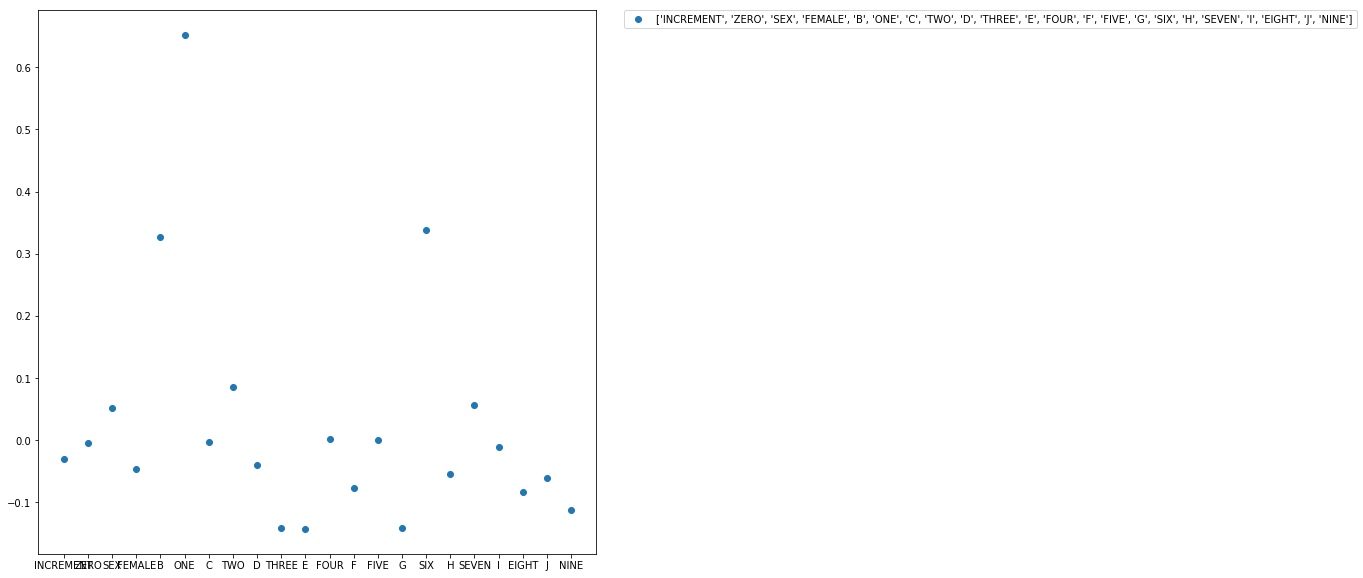

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


test = (zero * T).v

similarity = []
for sp_name in vocab.keys:
    vec = vocab.parse(sp_name).v
    similarity.append(np.dot(test, vec))
 
   
#similarity = vocab.dot(test)    # compute dot product with each vector in the vocab
  
plt.figure(figsize = (10,10))    
plt.plot(vocab.keys, similarity, 'o', label=vocab.keys)   
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

Succ1, succ2, succ3 all work here. 